In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [130]:
amazon_review_df = pd.read_csv("amazonereview.csv")
amazon_review_df2 = pd.DataFrame(amazon_review_df['reviews.text'])
amazon_review_df2['reviews.rating'] = amazon_review_df['reviews.rating']

C:\Users\ktser\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
#amazon_review_df2.to_csv("amazontextreview.csv", encoding='utf-8')

In [251]:
amazon_review_df = pd.read_csv("amazontextreview.csv").drop('Unnamed: 0', 1)
amazon_review_df.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [252]:
#Mean is high
amazon_review_df.describe()

,reviews.rating
count,34627.000000
mean,4.584573
std,0.735653
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Anything lower than 3.5 will be negative and over will be positive

In [253]:
amazon_review_df2 = np.where(amazon_review_df['reviews.rating'] < 3.5, 0, 1)
amazon_review_df2 = pd.DataFrame(amazon_review_df2)

In [254]:
amazon_review_df['reviews.rating'] = amazon_review_df2
amazon_review_df.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,1
3,I've had my Fire HD 8 two weeks now and I love...,1
4,I bought this for my grand daughter when she c...,1


In [255]:
#creating the keywords to predict negative comments
keywordslist = []
neg_words = amazon_review_df['reviews.text'][amazon_review_df['reviews.rating'] == 0]
for sentence in neg_words:
    sentence = sentence.split(' ')
    #sentence = ' '.join(sentence)
    #keywordslist.append(sentence)
    for words in sentence:
        keywordslist.append(words)

In [256]:
keywords = ','.join([i for i in keywordslist if i.isalpha()])
keywords = keywords.split(',')
len(keywords)

83277

In [257]:
keywords = list(set(keywords))
len(keywords)
#keywords = np.ndarray(keywords).unique().tolist()

5343

In [262]:
keywords

['understands',
 'web',
 'He',
 'supposedly',
 'disappears',
 'smudge',
 'WWE',
 'Gen',
 'COC',
 'nexus',
 'factor',
 'receive',
 'Greenlight',
 'User',
 'somewhere',
 'HATE',
 'lower',
 'Shouting',
 'cant',
 'Def',
 'Philips',
 'UE',
 'Radio',
 'commonly',
 'Falcon',
 'offering',
 'picky',
 'clones',
 'severely',
 'Alex',
 'indicated',
 'paperwhite',
 'bin',
 'construction',
 'letting',
 'selected',
 'parted',
 'hope',
 'Freezes',
 'luv',
 'subsidized',
 'user',
 'unreliable',
 'charges',
 'COULD',
 'jail',
 'beach',
 'perineum',
 'concerns',
 'Comcast',
 'other',
 'applies',
 'ASUS',
 'downloaded',
 'me',
 'waited',
 'ways',
 'internal',
 'girlfriend',
 'GETTING',
 'loved',
 'Again',
 'resolution',
 'top',
 'maneuver',
 'bargain',
 'beware',
 'Harmony',
 'discontinue',
 'evening',
 'otherwise',
 'Started',
 'Currently',
 'be',
 'cleat',
 'shelled',
 'Slingbox',
 'dislike',
 'yes',
 'ITEM',
 'stops',
 'pays',
 'photos',
 'albums',
 'during',
 'racing',
 'need',
 'Does',
 'six',
 'staf

In [263]:
for key in keywords:
    amazon_review_df[str(key)] = amazon_review_df['reviews.text'].str.contains(' ' + str(key) + ' ', case=False)

amazon_review_df['allcaps'] = amazon_review_df['reviews.text'].str.isupper()


In [265]:
amazon_review_df

,reviews.text,reviews.rating,understands,web,He,supposedly,disappears,smudge,WWE,Gen,...,ignorance,game,wet,fiber,hands,Ended,ill,forced,NOW,allcaps
0,This product so far has not disappointed. My c...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,great for beginner or experienced person. Boug...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Inexpensive tablet for him to use and learn on...,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,I've had my Fire HD 8 two weeks now and I love...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,I bought this for my grand daughter when she c...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,This amazon fire 8 inch tablet is the perfect ...,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"Great for e-reading on the go, nice and light ...",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,"I gave this as a Christmas gift to my inlaws, ...",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Great as a device to read books. I like that i...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,I love ordering books and reading them with th...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apply PCA

In [ ]:
data = amazon_review_df[keywords + ['allcaps']]
target = amazon_review_df['reviews.rating']

In [ ]:
#set the model
bnb = BernoulliNB()

#Create input and outcome variables
data = df_test_over.drop('Class', 1)
target = amazon_review_df2['0']

#fit the data to the model
bnb.fit(data, target)

#predict using the input data and save the predicted outcomes to a variable
y_pred = bnb.predict(data)

#Evaluate the model using confusion matrix
print("Accurcy of froud detection:" + str(233382/(233382+50933)))
confusion_matrix(target, y_pred)

In [91]:
y = sorted(amazon_review_df['reviews.rating'].dropna().unique().tolist())
classlist = []
countlist = {}
for x in y:
    classlist.append("Class_{}".format(int(x)))
    countlist['{}'.format(classlist[int(x-1)])] = amazon_review_df['reviews.rating'][amazon_review_df['reviews.rating'] == x].count()

countlist

{'Class_1': 410,
 'Class_2': 402,
 'Class_3': 1499,
 'Class_4': 8541,
 'Class_5': 23775}

In [96]:
rating_count = pd.DataFrame.from_dict(countlist, orient='index')
rating_count.columns = ['Count']
rating_count

,Count
Class_1,410
Class_2,402
Class_3,1499
Class_4,8541
Class_5,23775


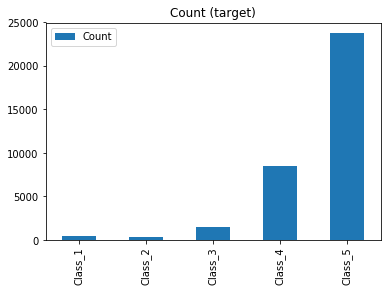

In [100]:
rating_count.plot(kind='bar', title='Count (target)');
plt.show()

# Based on the graph, a under and over-sampling method needs to be imployed

# Random under-sampling

In [107]:
df_class_1_under = amazon_review_df[amazon_review_df['reviews.rating'] == 1].sample(countlist['Class_2'])
df_class_2_under = amazon_review_df[amazon_review_df['reviews.rating'] == 2].sample(countlist['Class_2'])
df_class_3_under = amazon_review_df[amazon_review_df['reviews.rating'] == 3].sample(countlist['Class_2'])
df_class_4_under = amazon_review_df[amazon_review_df['reviews.rating'] == 4].sample(countlist['Class_2'])
df_class_5_under = amazon_review_df[amazon_review_df['reviews.rating'] == 5].sample(countlist['Class_2'])

df_AmaReview_under = pd.concat([df_class_1_under, df_class_2_under, df_class_3_under, df_class_4_under, df_class_5_under], axis=0)
df_AmaReview_under.head()

,reviews.text,reviews.rating
31497,Tried setting this up on 2 TV's using both WIF...,1.0
22645,Found out after having had opened and tried pr...,1.0
27916,Let's be realistic on two fronts about the Ech...,1.0
4806,"purchased it tonight, time is wrong, you canno...",1.0
13973,"I bought this for my 3 year old, so she would ...",1.0


In [109]:
y = sorted(df_AmaReview_under['reviews.rating'].unique().tolist())
classlist = []
countlist = {}
for x in y:
    classlist.append("Class_{}".format(int(x)))
    countlist['{}'.format(classlist[int(x-1)])] = df_AmaReview_under['reviews.rating'][df_AmaReview_under['reviews.rating'] == x].count()

countlist

{'Class_1': 402,
 'Class_2': 402,
 'Class_3': 402,
 'Class_4': 402,
 'Class_5': 402}

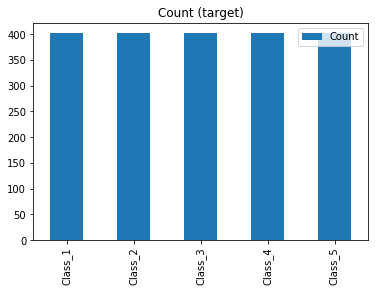

In [111]:
rating_count = pd.DataFrame.from_dict(countlist, orient='index')
rating_count.columns = ['Count']
rating_count.plot(kind='bar', title='Count (target)');
plt.show()

# Create features using the words in the reviews